In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import trackpy as tp
import pandas as pd
from tqdm import tqdm
import shutil
from skimage.morphology import extrema
from scipy import ndimage

import pims as pm
from pims import pipeline # To analyze one frame at each time

In [3]:

def fond_m(image,prim_frame,inten=255):
    pas = len(image)//50
    test = [cv2.threshold(x,inten,255,cv2.THRESH_TRUNC)[1] for x in image[prim_frame::pas]]
    fond= np.mean(test, axis=0)
    del test
    #fond=np.array(fond,dtype=np.uint8)
    return fond


def crop_ajustable(img,x,y,t):#fait un crop
    ymax,xmax=img.shape
    return img[max([y-t,0]):min([y+t,ymax]),max([x-t,0]):min([x+t,xmax])]



def mask_circle(shape,X,Y,R1):
    mask = np.zeros(shape,dtype=np.uint8)
    mask = cv2.circle(mask, (int(X),int(Y)), int(R1), 1, -1)
    return mask


def ext(L):#crée une liste ordonnée de l'ensemble des éléments dans une série pandas
    return sorted(list(set(L)))


def approx_ultimate_points(bw):
    bw_dist = ndimage.distance_transform_edt(bw)
    bw_maxima = extrema.h_maxima(bw_dist, 0.5)
    bw_maxima = ndimage.binary_dilation(bw_maxima)
    bw_ultimate = np.bitwise_and(bw, bw_maxima)
    # Reduce all ultimate point regions to a single point
    # (Here, we take the centroids - this wouldn't be robust for weird shapes with holes,
    # but should be ok here)
    lab_ultimate, n = ndimage.label(bw_ultimate)
    #com = ndimage.measurements.center_of_mass(lab_ultimate, lab_ultimate, index=range(1, n+1))
    return lab_ultimate



@pm.pipeline
def gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fb0eedfaef0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


3939 30.0


  0%|          | 0/100 [00:00<?, ?it/s]

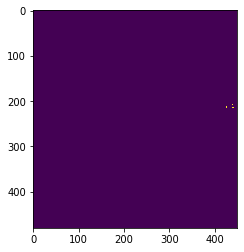

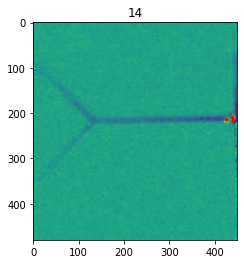

  1%|          | 1/100 [00:00<00:26,  3.74it/s]

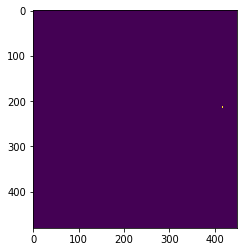

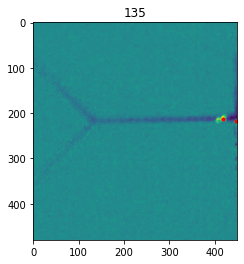

  2%|▏         | 2/100 [00:00<00:26,  3.68it/s]

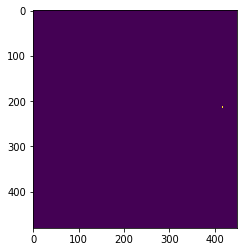

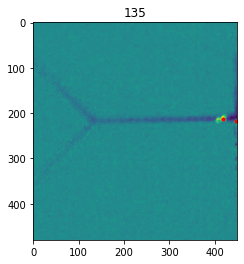

  3%|▎         | 3/100 [00:00<00:24,  4.01it/s]

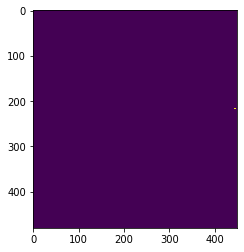

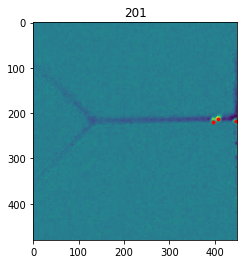

  4%|▍         | 4/100 [00:00<00:23,  4.07it/s]

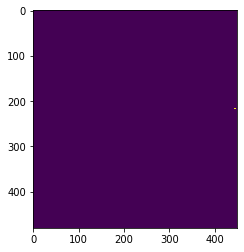

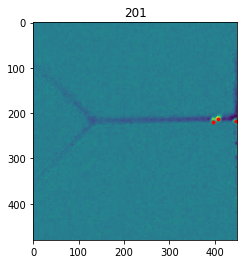

  5%|▌         | 5/100 [00:01<00:21,  4.34it/s]

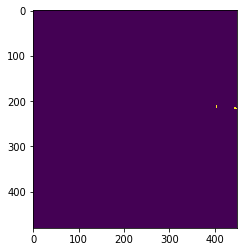

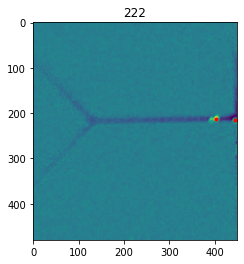

  6%|▌         | 6/100 [00:01<00:21,  4.45it/s]

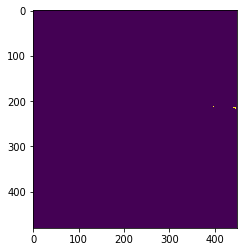

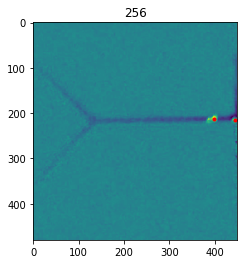

  7%|▋         | 7/100 [00:01<00:20,  4.49it/s]

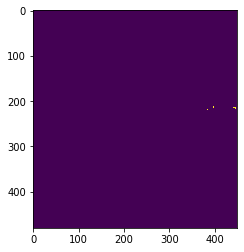

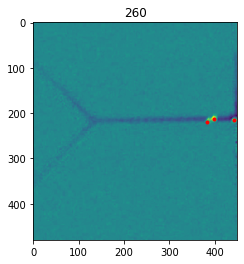

  8%|▊         | 8/100 [00:01<00:19,  4.62it/s]

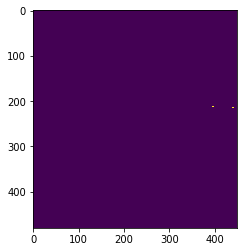

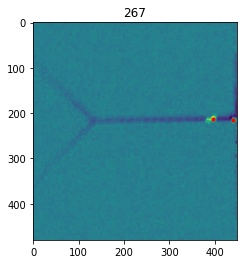

  9%|▉         | 9/100 [00:02<00:19,  4.71it/s]

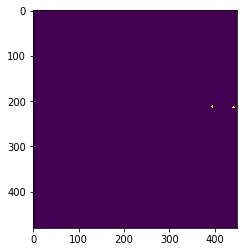

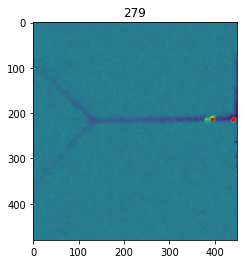

 10%|█         | 10/100 [00:02<00:18,  4.77it/s]

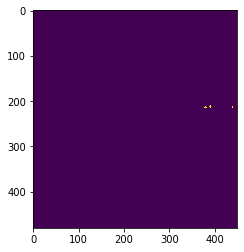

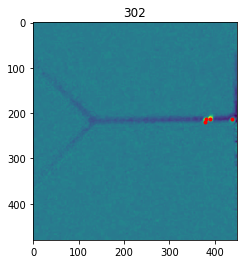

 11%|█         | 11/100 [00:02<00:18,  4.75it/s]

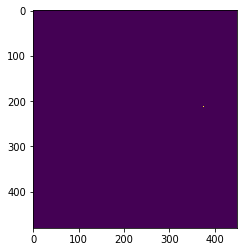

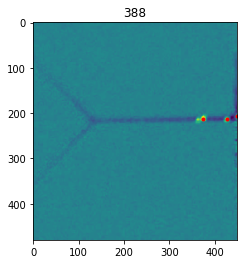

 12%|█▏        | 12/100 [00:02<00:19,  4.50it/s]

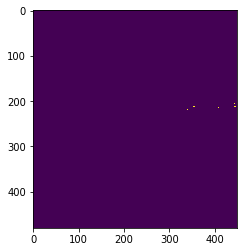

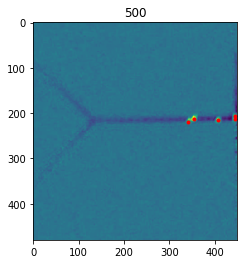

 13%|█▎        | 13/100 [00:03<00:24,  3.54it/s]

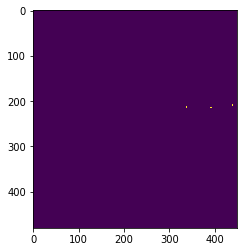

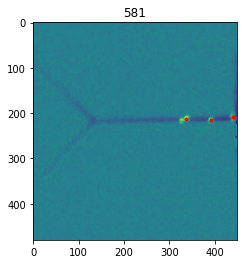

 14%|█▍        | 14/100 [00:03<00:23,  3.67it/s]

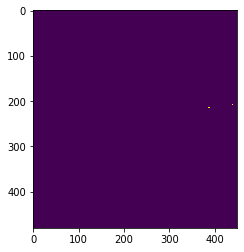

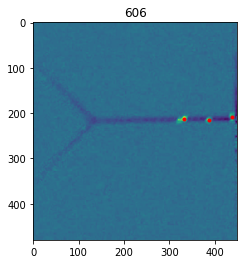

 15%|█▌        | 15/100 [00:03<00:21,  3.93it/s]

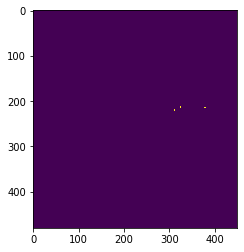

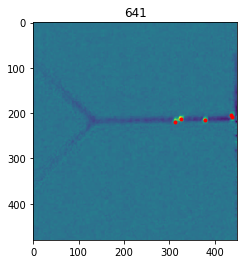

 16%|█▌        | 16/100 [00:03<00:20,  4.11it/s]

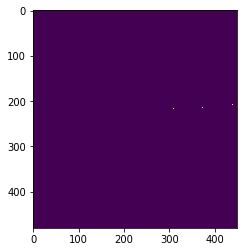

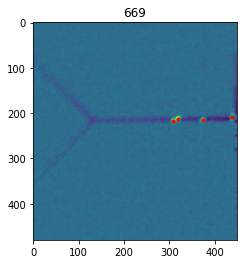

 17%|█▋        | 17/100 [00:03<00:19,  4.27it/s]

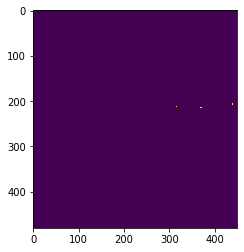

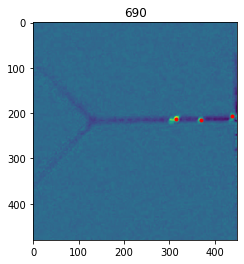

 18%|█▊        | 18/100 [00:04<00:18,  4.41it/s]

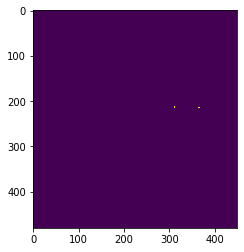

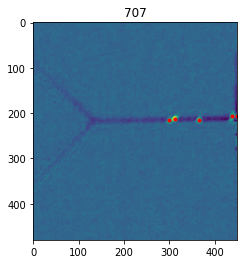

 19%|█▉        | 19/100 [00:04<00:17,  4.53it/s]

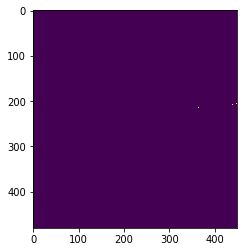

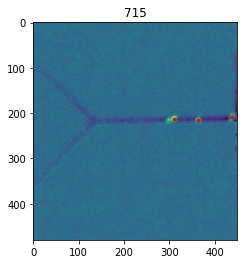

 20%|██        | 20/100 [00:04<00:17,  4.65it/s]

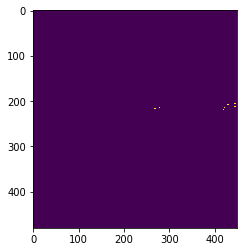

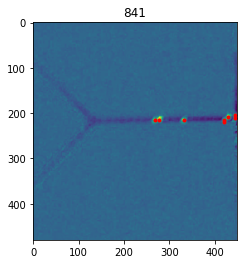

 21%|██        | 21/100 [00:04<00:19,  4.02it/s]

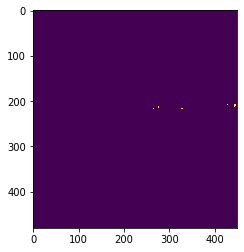

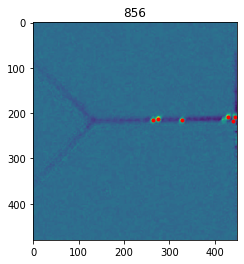

 22%|██▏       | 22/100 [00:05<00:18,  4.21it/s]

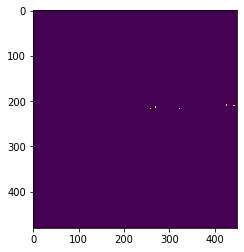

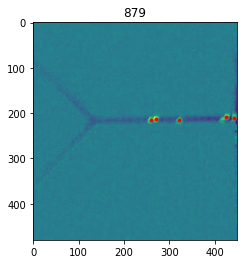

 23%|██▎       | 23/100 [00:05<00:17,  4.36it/s]

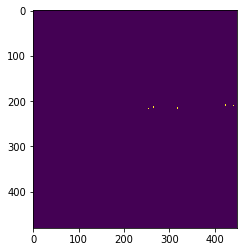

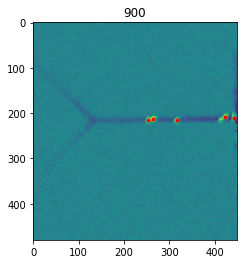

 24%|██▍       | 24/100 [00:05<00:17,  4.47it/s]

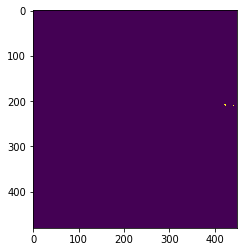

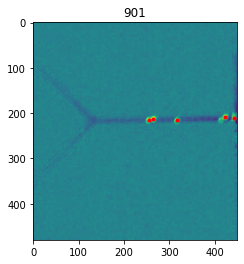

 25%|██▌       | 25/100 [00:05<00:16,  4.63it/s]

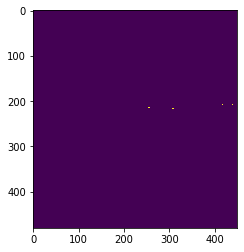

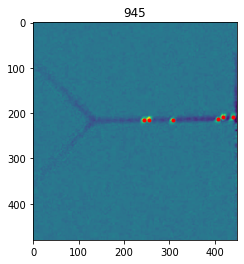

 26%|██▌       | 26/100 [00:05<00:16,  4.62it/s]

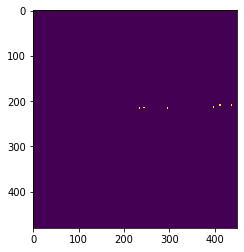

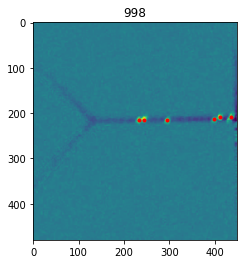

 27%|██▋       | 27/100 [00:06<00:15,  4.59it/s]

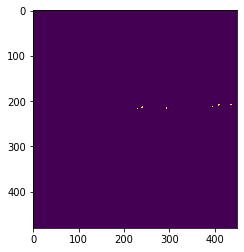

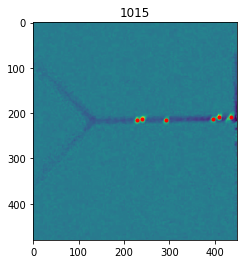

 28%|██▊       | 28/100 [00:06<00:15,  4.68it/s]

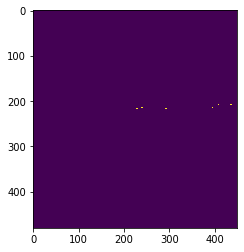

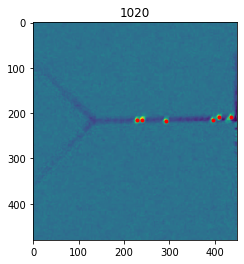

 29%|██▉       | 29/100 [00:06<00:16,  4.28it/s]

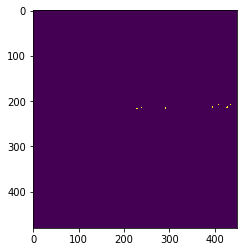

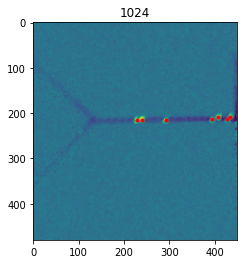

 30%|███       | 30/100 [00:06<00:15,  4.50it/s]

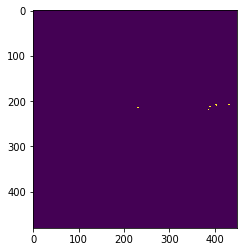

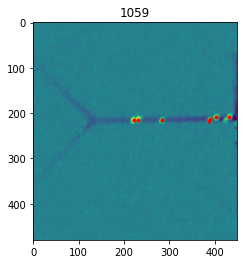

 31%|███       | 31/100 [00:07<00:15,  4.55it/s]

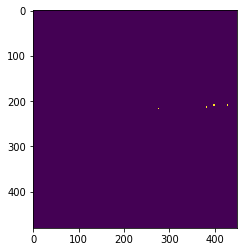

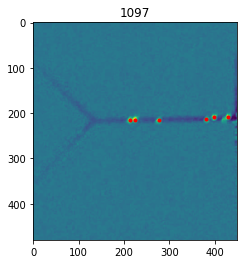

 32%|███▏      | 32/100 [00:07<00:14,  4.59it/s]

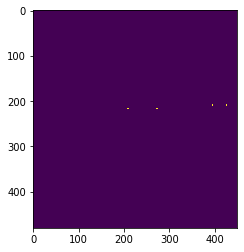

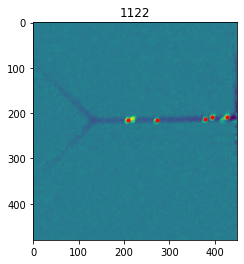

 33%|███▎      | 33/100 [00:07<00:14,  4.65it/s]

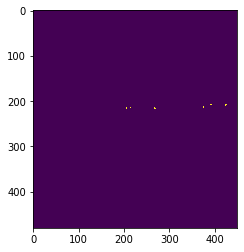

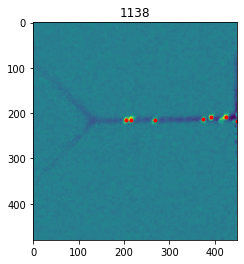

 34%|███▍      | 34/100 [00:07<00:13,  4.73it/s]

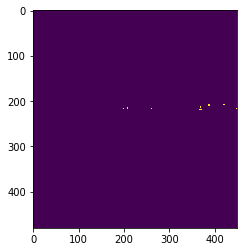

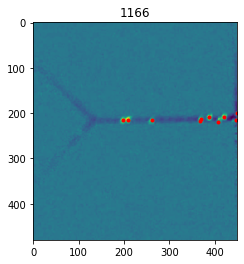

 35%|███▌      | 35/100 [00:07<00:13,  4.73it/s]

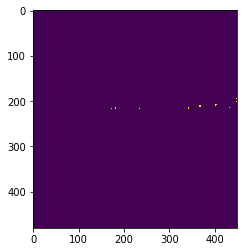

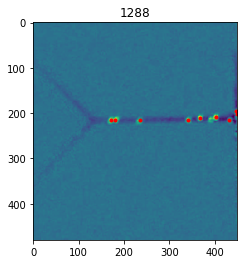

 36%|███▌      | 36/100 [00:08<00:15,  4.07it/s]

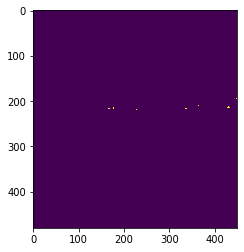

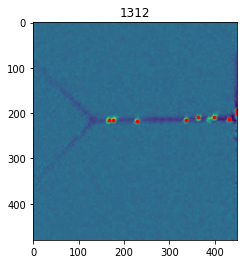

 37%|███▋      | 37/100 [00:08<00:14,  4.24it/s]

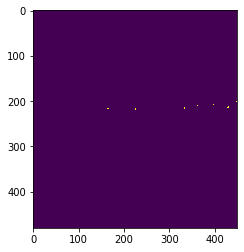

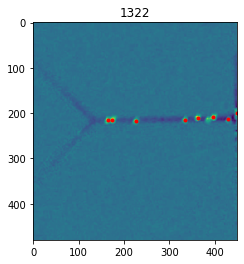

 38%|███▊      | 38/100 [00:08<00:14,  4.42it/s]

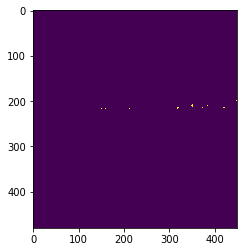

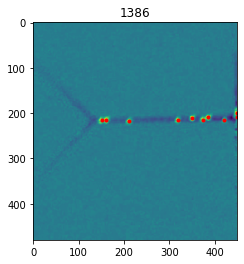

 39%|███▉      | 39/100 [00:08<00:13,  4.36it/s]

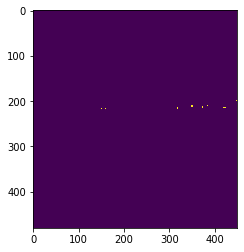

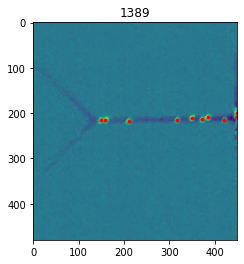

 40%|████      | 40/100 [00:09<00:13,  4.53it/s]

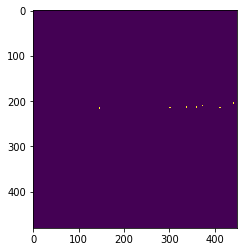

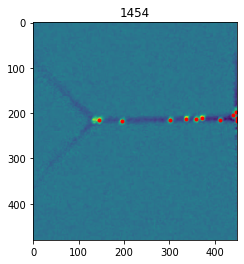

 41%|████      | 41/100 [00:09<00:13,  4.44it/s]

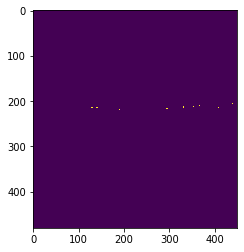

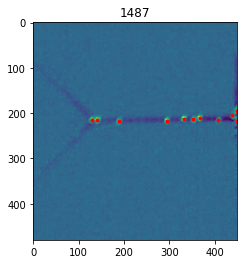

 42%|████▏     | 42/100 [00:09<00:13,  4.45it/s]

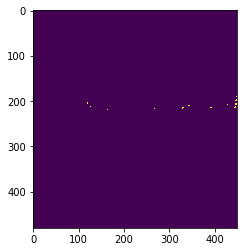

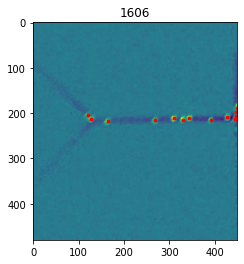

 43%|████▎     | 43/100 [00:09<00:14,  3.92it/s]

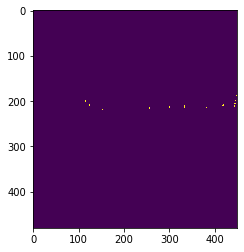

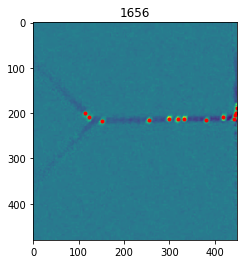

 44%|████▍     | 44/100 [00:10<00:13,  4.05it/s]

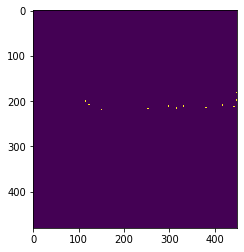

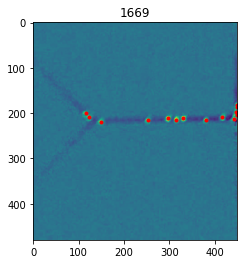

 45%|████▌     | 45/100 [00:10<00:14,  3.83it/s]

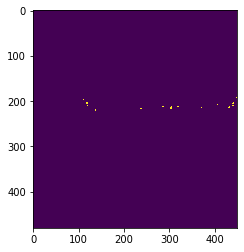

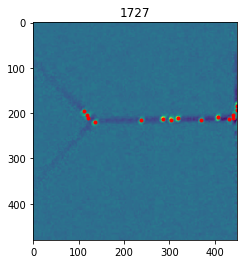

 46%|████▌     | 46/100 [00:10<00:13,  3.96it/s]

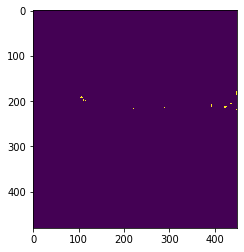

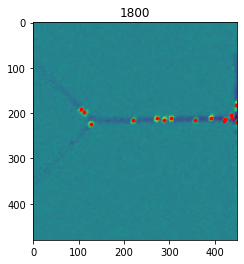

 47%|████▋     | 47/100 [00:10<00:13,  4.00it/s]

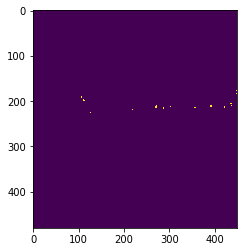

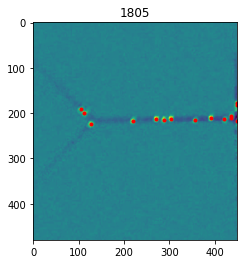

 48%|████▊     | 48/100 [00:11<00:12,  4.25it/s]

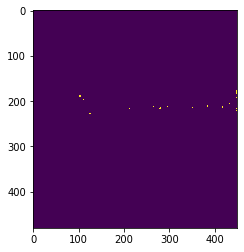

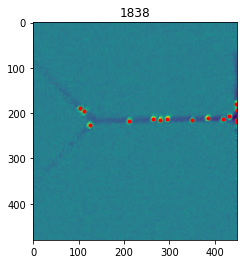

 49%|████▉     | 49/100 [00:11<00:11,  4.32it/s]

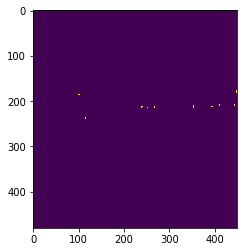

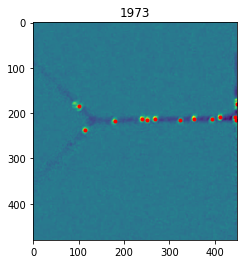

 50%|█████     | 50/100 [00:11<00:12,  3.87it/s]

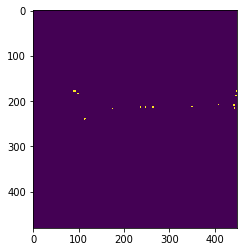

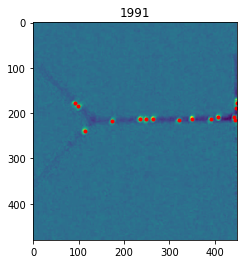

 51%|█████     | 51/100 [00:11<00:12,  4.08it/s]

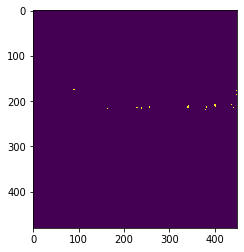

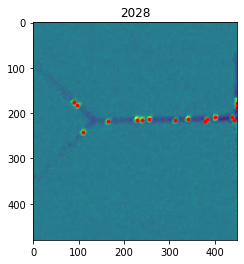

 52%|█████▏    | 52/100 [00:12<00:11,  4.19it/s]

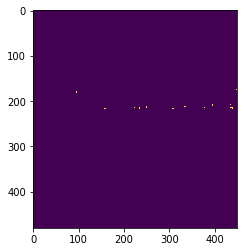

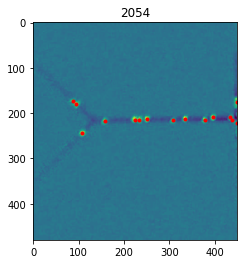

 53%|█████▎    | 53/100 [00:12<00:10,  4.31it/s]

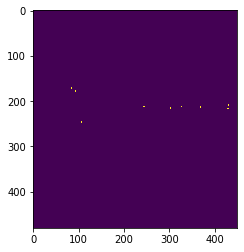

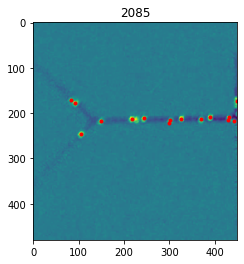

 54%|█████▍    | 54/100 [00:12<00:10,  4.38it/s]

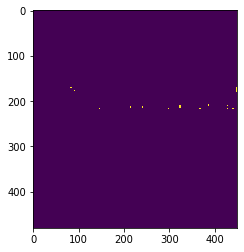

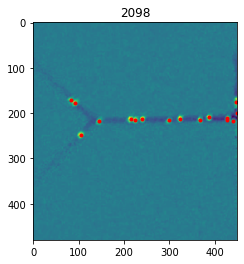

 55%|█████▌    | 55/100 [00:12<00:10,  4.48it/s]

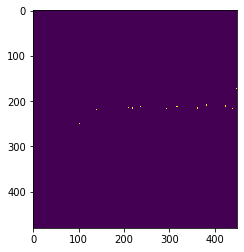

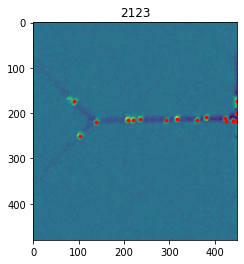

 56%|█████▌    | 56/100 [00:12<00:09,  4.54it/s]

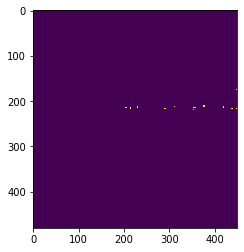

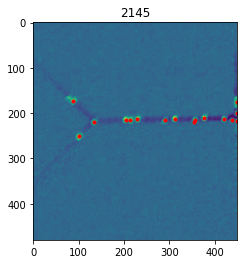

 57%|█████▋    | 57/100 [00:13<00:09,  4.58it/s]

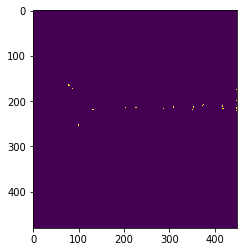

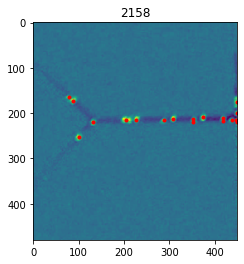

 58%|█████▊    | 58/100 [00:13<00:09,  4.62it/s]

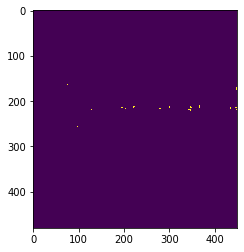

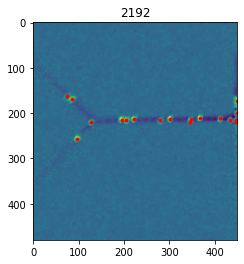

 59%|█████▉    | 59/100 [00:13<00:08,  4.60it/s]

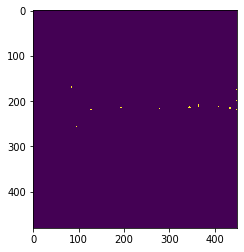

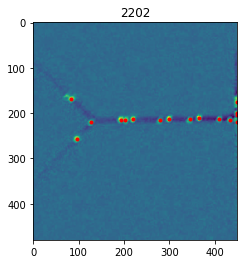

 60%|██████    | 60/100 [00:13<00:08,  4.66it/s]

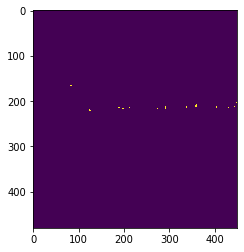

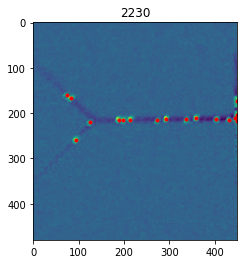

 61%|██████    | 61/100 [00:14<00:09,  4.15it/s]

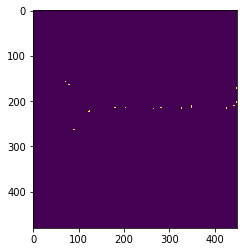

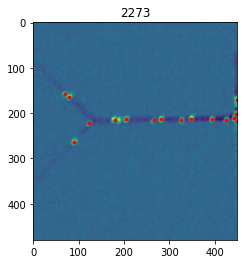

 62%|██████▏   | 62/100 [00:14<00:08,  4.23it/s]

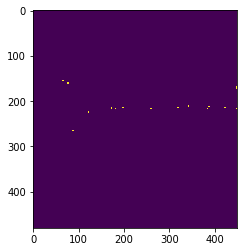

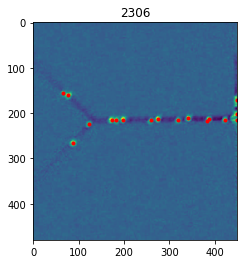

 63%|██████▎   | 63/100 [00:14<00:08,  4.32it/s]

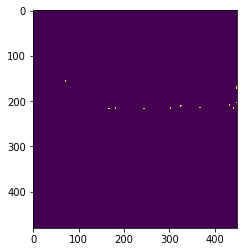

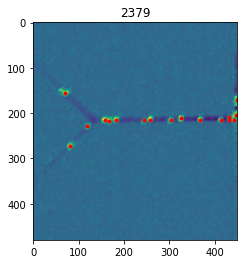

 64%|██████▍   | 64/100 [00:14<00:08,  4.26it/s]

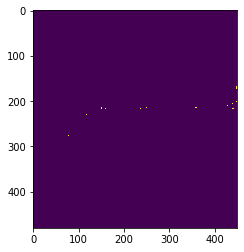

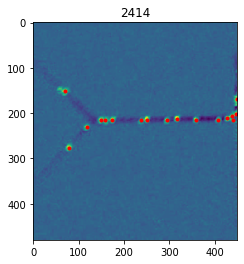

 65%|██████▌   | 65/100 [00:15<00:08,  4.34it/s]

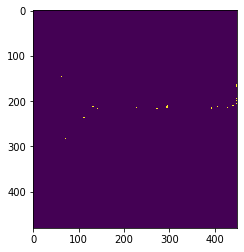

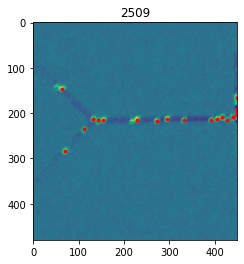

 66%|██████▌   | 66/100 [00:15<00:08,  4.18it/s]

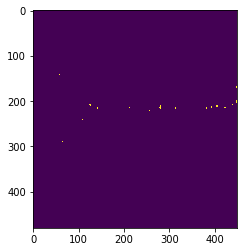

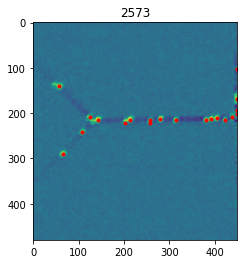

 67%|██████▋   | 67/100 [00:15<00:07,  4.19it/s]

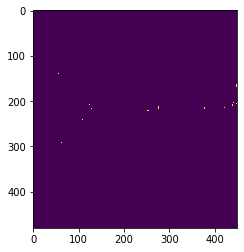

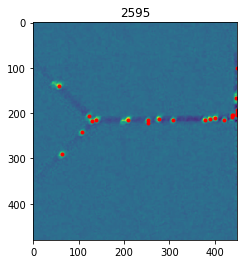

 68%|██████▊   | 68/100 [00:15<00:07,  4.31it/s]

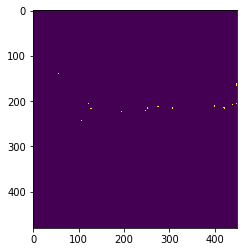

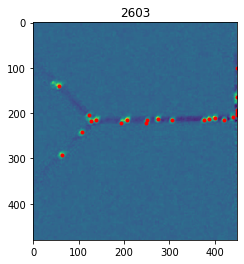

 69%|██████▉   | 69/100 [00:15<00:06,  4.45it/s]

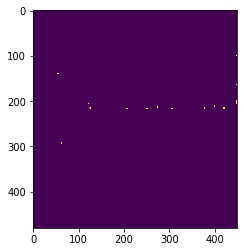

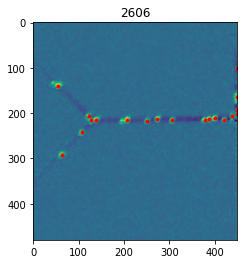

 70%|███████   | 70/100 [00:16<00:06,  4.59it/s]

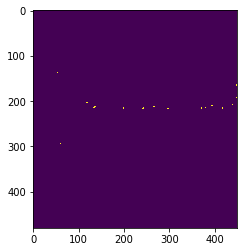

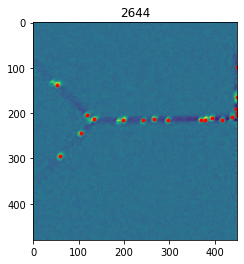

 71%|███████   | 71/100 [00:16<00:06,  4.57it/s]

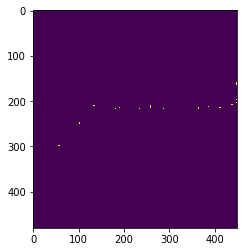

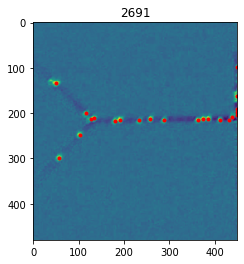

 72%|███████▏  | 72/100 [00:16<00:06,  4.47it/s]

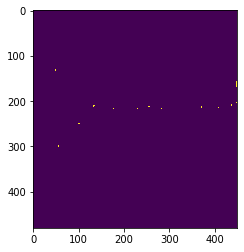

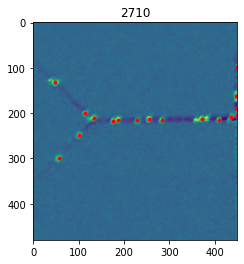

 73%|███████▎  | 73/100 [00:16<00:05,  4.55it/s]

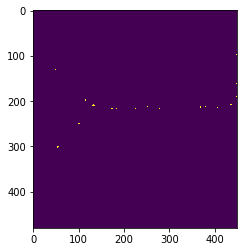

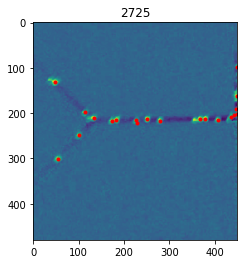

 74%|███████▍  | 74/100 [00:17<00:05,  4.60it/s]

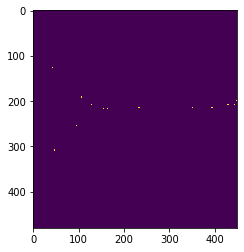

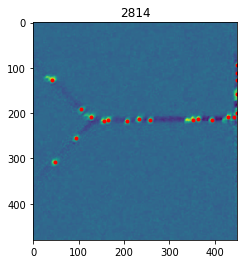

 75%|███████▌  | 75/100 [00:17<00:05,  4.38it/s]

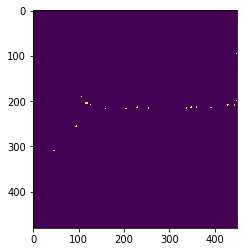

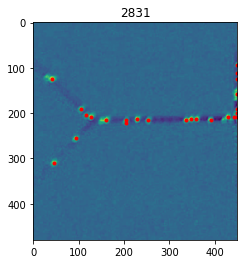

 76%|███████▌  | 76/100 [00:17<00:05,  4.48it/s]

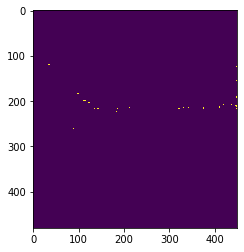

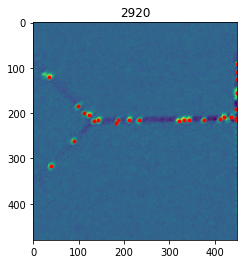

 77%|███████▋  | 77/100 [00:17<00:05,  3.93it/s]

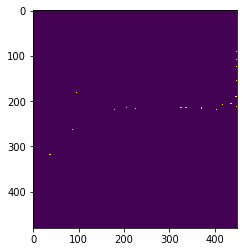

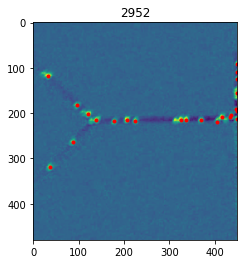

 78%|███████▊  | 78/100 [00:18<00:05,  4.10it/s]

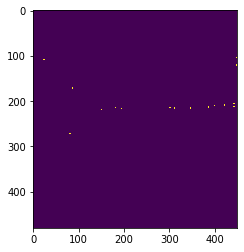

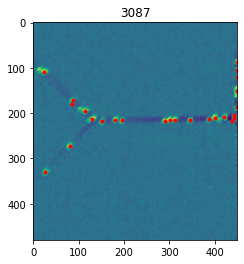

 79%|███████▉  | 79/100 [00:18<00:05,  3.73it/s]

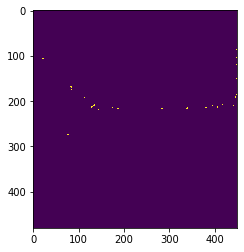

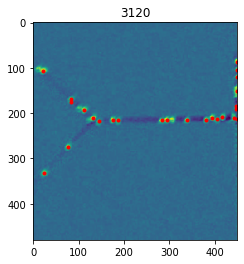

 80%|████████  | 80/100 [00:18<00:05,  3.93it/s]

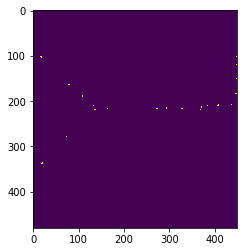

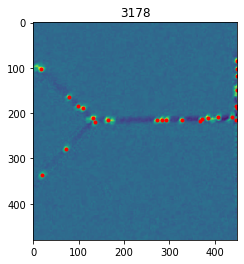

 81%|████████  | 81/100 [00:18<00:04,  4.01it/s]

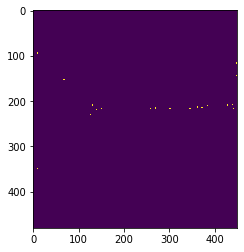

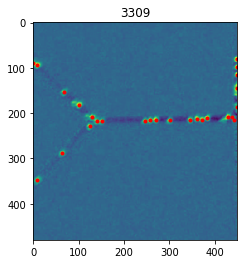

 82%|████████▏ | 82/100 [00:19<00:04,  3.67it/s]

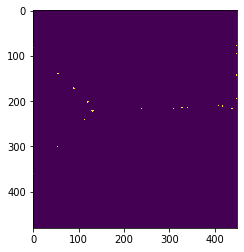

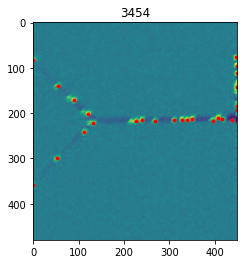

 83%|████████▎ | 83/100 [00:19<00:04,  3.44it/s]

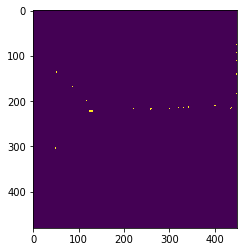

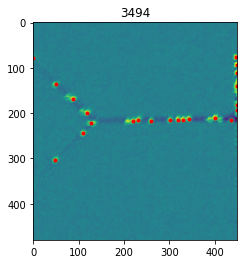

 84%|████████▍ | 84/100 [00:19<00:04,  3.69it/s]

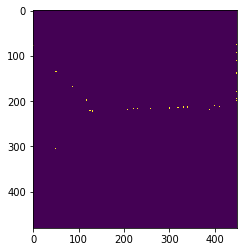

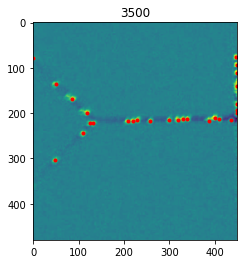

 85%|████████▌ | 85/100 [00:19<00:03,  3.98it/s]

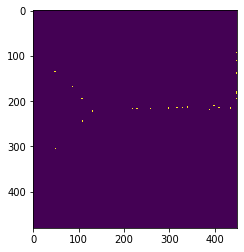

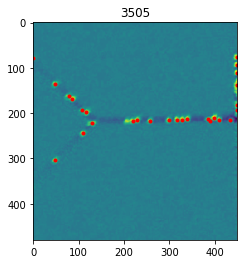

 86%|████████▌ | 86/100 [00:20<00:03,  4.23it/s]

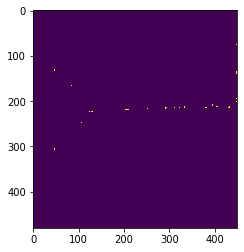

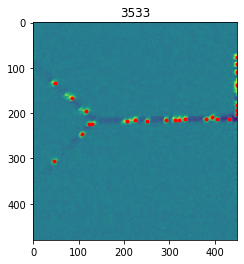

 87%|████████▋ | 87/100 [00:20<00:02,  4.34it/s]

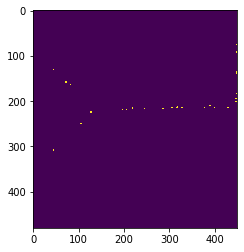

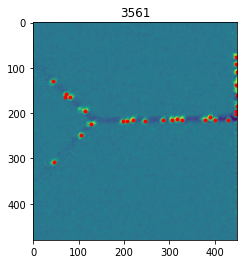

 88%|████████▊ | 88/100 [00:20<00:02,  4.43it/s]

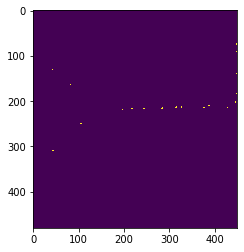

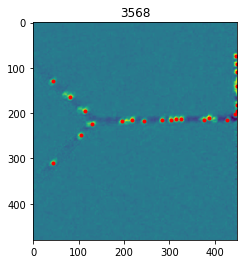

 89%|████████▉ | 89/100 [00:20<00:02,  4.56it/s]

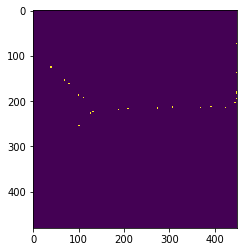

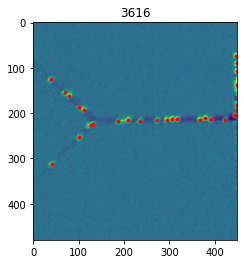

 90%|█████████ | 90/100 [00:20<00:02,  4.50it/s]

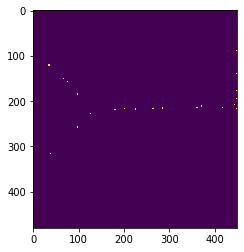

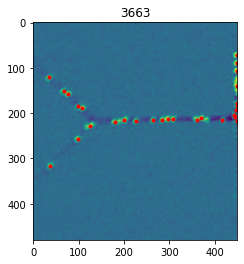

 91%|█████████ | 91/100 [00:21<00:02,  4.46it/s]

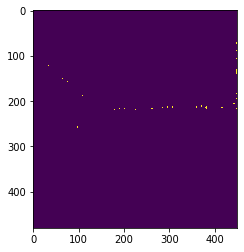

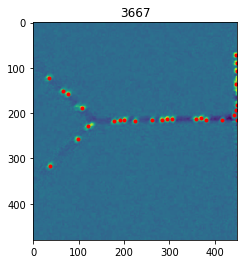

 92%|█████████▏| 92/100 [00:21<00:01,  4.59it/s]

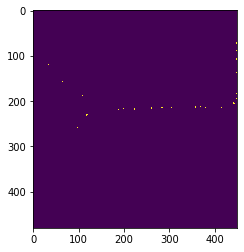

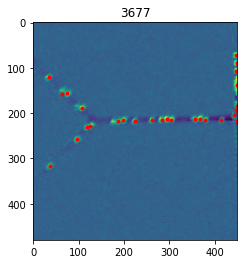

 93%|█████████▎| 93/100 [00:21<00:01,  4.17it/s]

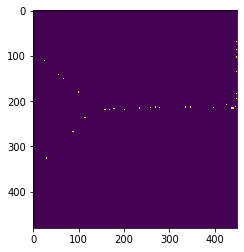

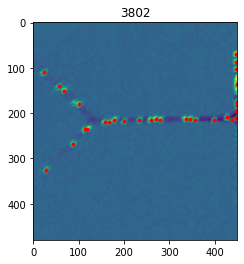

 94%|█████████▍| 94/100 [00:22<00:01,  3.78it/s]

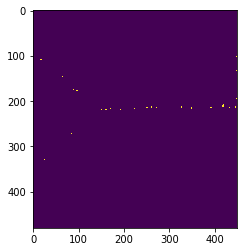

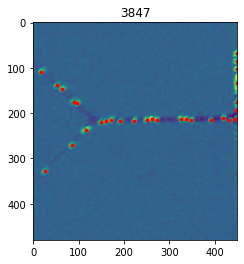

 95%|█████████▌| 95/100 [00:22<00:01,  3.94it/s]

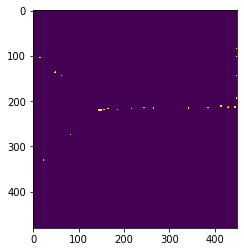

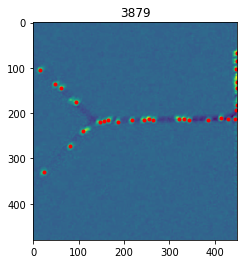

 96%|█████████▌| 96/100 [00:22<00:00,  4.11it/s]

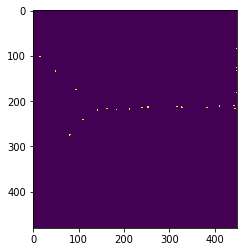

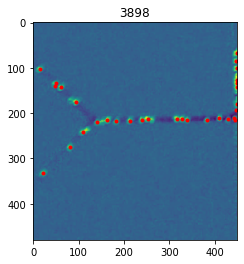

 97%|█████████▋| 97/100 [00:22<00:00,  4.29it/s]

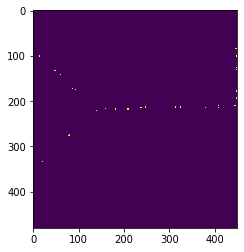

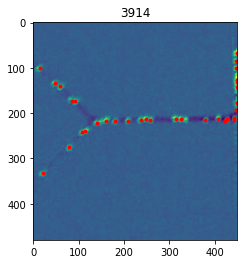

 98%|█████████▊| 98/100 [00:22<00:00,  4.42it/s]

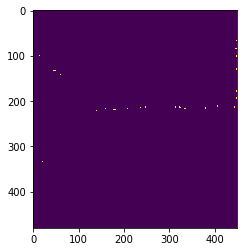

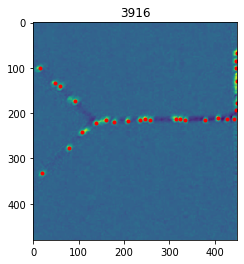

 99%|█████████▉| 99/100 [00:23<00:00,  4.58it/s]

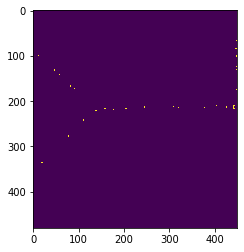

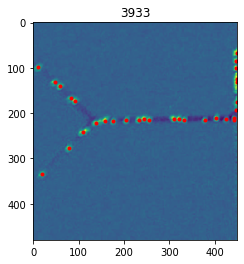

100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


In [5]:
tol_M=1.3 #1.3 factor threshold from the average

k=40

#%%
path="/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP2_2023_03_23_11_23_39_cut.avi"
video=pm.open(path)
frame_count = int(len(video)-1)
fps=video.frame_rate
print(frame_count,fps)
video=gray(video)
cx,cy,cz=video.frame_shape

background=fond_m(video,50)


Test=True
invert_image=True


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
#pour faire un test



#%% Precise tracking with crop
size_gaussian=5
frame_list=range(frame_count)
#frame_list=range(35000,40000)
data=pd.DataFrame()
if(Test): frame_list=np.sort(np.random.randint(0,frame_count,100))
#frame_list=[1012]
i=0
j=0
#mkdir


for frame in tqdm(frame_list[::1]):#
    
    print_image=False
    img1=video[round(frame)]
    img1=img1-background
    img1=img1-np.min(img1)
    img1=img1/np.max(img1)*255
    result=img1.astype(np.uint8)[::,50:500]
    if invert_image : result=cv2.bitwise_not(result)
    result=cv2.GaussianBlur(result,(size_gaussian,size_gaussian),0)
    img2=result.copy()
# =============================================================================
#     plt.figure()
#     plt.imshow(result)
# =============================================================================
    M=int(np.mean(result))
    ret,result=cv2.threshold(result,int(M*tol_M),255,cv2.THRESH_BINARY)
# =============================================================================
#     plt.figure()
#     plt.imshow(result)
# =============================================================================
    #result = cv2.erode(result, kernel,iterations=3)
    #result=cv2.dilate(result, kernel,iterations=1)

    result=approx_ultimate_points(result)
    result[result>0]=1
# =============================================================================
#     plt.figure()
#     plt.imshow(result)
# =============================================================================
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(result.astype(np.uint8), None, None, None, 8, cv2.CV_16U)
# =============================================================================
    plt.figure()
    plt.imshow(result)
# =============================================================================
    h=pd.DataFrame(np.array([centroids[1:,0],centroids[1:,1],stats[1:,cv2.CC_STAT_AREA]]).T,
           columns=('x','y','area'))
    plt.figure()
    plt.imshow(img2)
    plt.plot(h.x,h.y, color='r',marker='.',linestyle='')
    plt.title(frame)
    plt.show()


In [6]:
h

x      y  area
0   448.750000   67.0   4.0
1   447.800000   84.0  10.0
2    11.000000   99.0  11.0
3   448.200000  100.5  10.0
4   448.666667  124.5   6.0
5   448.666667  130.5   6.0
6    47.000000  132.0   5.0
7    58.000000  141.0   5.0
8    82.500000  167.0   8.0
9    91.000000  173.0   5.0
10  448.750000  175.0   4.0
11  447.000000  193.0   5.0
12  404.000000  210.0   5.0
13  442.300000  210.3  10.0
14  310.500000  212.5   8.0
15  245.000000  213.0   5.0
16  321.000000  213.5   8.0
17  378.000000  214.0   5.0
18  426.000000  213.0   5.0
19  157.300000  216.3  10.0
20  205.000000  216.0   5.0
21  233.000000  215.0   5.0
22  255.000000  215.0   5.0
23  332.000000  215.0   5.0
24  442.500000  215.5   8.0
25  176.500000  218.0   8.0
26  138.500000  221.0  14.0
27  110.500000  242.0   8.0
28   78.500000  277.0   8.0
29   19.000000  335.0   5.0